# Chapter 8

## Fine-Tuning Classification Algorithms

### Overview
This chapter will help you optimize predictive analytics using classification algorithms such as **Suport Vector Machines, Decision Trees, and Random Forests**, which are some of the most common classification algorithms from scikit-learn machine learning library. Moreover, you will learn how to implement **Tree-based Classification Models**, which you have used previously for regression. Next, you will learn how to choose appropriate performance metrics for evaluatinf the performance of a classification model, Finally, you will out all these skills to use in solving a customer churn prediction problem where you will optimize and evaluate the best classification algorithm for predicting whether a given customer will churn or not. 

### Introduction
Your firm has taken a project from Amazon to predict whether or not a user will buy a product during festive season sale campaigns. You have been provided anonymized data about customer activity on the website - **the number of products purchcased, their prices, categories of the products, and more.** You'll be working on problems like these to understand how to choose the right classification algorithm by evaluating its perforrmance using various metrics. Picking the right performance metrics and optimizing, fine-tuning, and evaluating the model is an important part of building any supervised machine learning model. Moreoverm choosing an appropriate machine learning model is an art that requires experience, and each algorithm has its advantages and disadvantages. 


### Support Vector Machines
When dealing with data that is linearly seperable, the goal is to find the boundry between classes so that there are fewer misclassification errors. Using a margin optimizes the decision boundry of the data point classification. 

**Advantages of SVM Algorithm:**
- SVMs are effecgtive when dealing with high-dimensional data, where the number of dimensions is moer than the number of training samples. 
- SVMs are known for their use of the kernel function, making it a very versatile algorithm. 
- Kernel methods are mathematical functions used to convert data from lower-dimensional space to higher-dimensional space, or vise versa. 

**Disadvantages of SVM Algorithm:**
- SVMs do not calculate probability directly, and instead use five-fold cross-validation to calculate probability, which can make the algorithm considerable slow. 
- With high-dimensional data, it is important to choose th ekernal function and regularization term, which can make the process very slow. 

**Importing SVM-based Classifier:**
- from sklearn import svm
- model = svm.SVC()  - You can also specify the kernel type "Linear, sigmoid, rbf, so on" 

# Exercise 8.01: Training an SVM Algorithm over a Dataset.




In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score

import numpy as np

In [2]:
data = pd.read_csv("Exercise8.01/Shill_Bidding_Dataset.csv")

data.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [3]:
#Remove the columns that are irrelevant to the case study. 

data.drop(['Record_ID', 'Auction_ID', 'Bidder_ID'], axis=1, inplace=True)

data.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [4]:
#Check the data types

data.dtypes

Bidder_Tendency           float64
Bidding_Ratio             float64
Successive_Outbidding     float64
Last_Bidding              float64
Auction_Bids              float64
Starting_Price_Average    float64
Early_Bidding             float64
Winning_Ratio             float64
Auction_Duration            int64
Class                       int64
dtype: object

In [5]:
#Check for any missing values

data.isnull().sum()

Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

In [6]:
#Split the data into train and test sets. 

target = 'Class'

X = data.drop(target, axis=1)

y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = .5, random_state=123,\
                                                   stratify=y)

In [7]:
#Fit the liner SVM model with C=1

clf_svm = svm.SVC(kernel='linear', C=1)
clf_svm.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [8]:
#Calculate the accuracy score ofo the model

clf_svm.score(X_test, y_test)

0.9775387535590003

The accuracy score implies that the model can predict 97.75% of the test data accurately. 

### End Exercise 8.01

## Decision Trees

**Advantages:**
- Easy to understand and visualize
- handle both numerical and categorical data
- requirement for data cleaning is very low sinc ethey can handle missing data
- They are non-parametric machine learning algorithms that make no assumptions reguarding space distribution and classifier structures.
- It's a white box model, rather than a black-box model like neural networks, and can explain the logic of the split using boolean values. 

**Disadvantages:**
- Tend to overfit data very easily, pruning is required to prevent overfitting the model.
- They are not suitable for imbalanced data, where you may have a biased decision tree. 

**Implementing Decision Tree Classifier:** 
- from sklearn import tree
- from sklearn.tree import export_graphviz
- from IPthon.display import Image
- from six import StringIO
- clf_tree = tree.DecisionTreeClassifier()
- clf_tree.predict(X)

**Once decision tree is trained, plot the tree:**
- dot_data = StringIO()
- export_graphviz(clf_tree, out_file=dot_data,
                filled=True, rounded= True, 
                class_names=['Positive','Negative'],
                max_depth=3,
                special_characters = True,
                feature_names=X.columns.values)
- graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
- Image(graph.create_png())



## Exercise 8.02: Implementing a Decision Tree Algorithm over a Dataset

In [9]:

from sklearn import tree



In [10]:
#fit the decision tree classifier:

clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)

In [11]:
clf_tree.score(X_test,y_test)

0.9977855109142676

The classifier can predict 99.81% of the test data correctly

### End Exercise 8.02

## Decision Tree Algorithm Formulation
**Impurity:**
1) Gini Impurity
- Minimize the probabiity of misclassification

2) Entropy
- maximizes mutual information

3) Misclassification error
- Prune trees

**Random Forest Ensable Methods:**
1) Bagging
- The data is randomly divided into several subsets and the model is trained over each subset. Several estimators are built independently from each other and then the predictions are averaged together, which ultimately helps reduce variance(overfitting). Random Forest belong to this category. 

2) Boosting
- base estimators are built sequentially and each model is very weak. The objective is to build models in sequence, where the latter models try to reduce the error from the previous model and therby reduce bias (underfitting). Advanced machine learning algorithms like CatBoost and XGBoost belong in this category. 

**Advantages to RF:**
- It does not suffer from overfitting, since you take the average of all the predictions
- It can be used to get feature importance.
- It can be used for both regression and classification tasks.
- It can be used for highly imbalanced datasets.
- It can handle missing data. 

**Disadvantages to RF:**
- It suffers from bias, although it reduces variance.
- It's mostly a black-box model and is difficult to explain.

**Importing the Random Forest Classifier** 
- from sklearn.ensemble import RandomForestClassifier
- clf = RandomForestClassifier(n_estimators=20, max_depth=None,min_samples_split=7, random_state=0)
- clf.fit(X_train, y_train)
- clf.predict(X)


## Exercise 8.03: Implementing a Random Forest Model Over a Dataset

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
clf = RandomForestClassifier(n_estimators=20, max_depth=None,
                            min_samples_split=7, random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=7, n_estimators=20, random_state=0)

In [14]:
clf.score(X_test, y_test)

0.9895602657386903

The Random Forest Classifier scores an accuracy of around 99%


### Summary of the Accuracy Percentages:
| **Classifier** | **Accuracy Percentage** |
|------|------|
| SVM | 97.75% |
| Decision Tree | 99.81% |
| Random Forest | 98.96% | 


### End Exercise 8.03


## Preprocessing Data for Machine Learning

**Standardization**
- Used to rescale features such that they have a mean of 0 and 1.
- from sklearn import preprocessing
- scaler = preprocessing.StandardScaler().fit(X_train)
- X_train_scalar = scaler.transform(X_train)
- X_test_train=scaler.transform(X_test)

## Exercise 8.04: Standardizing Data

In [62]:
from sklearn import preprocessing

churn = pd.read_csv('Exercise8.04/Churn_Modelling.csv')

In [63]:
churn.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [71]:
top5_features = churn[['Age','EstimatedSalary','CredRate','Balance','Prod Number','Exited']]

top5_features = top5_features[np.isfinite(top5_features).all(1)]

In [72]:
target = 'Exited'

X = top5_features.drop(target, axis=1)

y = top5_features[target]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X.values, y, test_size = .5, random_state=123,\
                                                   stratify=y)

In [66]:
scaler = preprocessing.StandardScaler().fit(X_train1)

In [67]:
scaler.mean_

array([3.87619620e+01, 1.00347564e+05, 6.49537538e+02, 7.59184484e+04,
       1.53313313e+00])

In [68]:
scaler.scale_

array([1.03536270e+01, 5.74556742e+04, 9.63642299e+01, 6.24461281e+04,
       5.74267426e-01])

In [69]:
X_train_scaler=scaler.transform(X_train1)

In [73]:
X_test_scaler=scaler.transform(X_test1)

X_train_scaler

array([[-0.36334726, -1.7321799 ,  2.08025802,  0.09234394, -0.92837084],
       [-0.55651628, -0.76169473,  1.13592422, -1.21574308,  0.81297815],
       [ 0.50591334, -1.22853444, -0.1716149 , -1.21574308,  0.81297815],
       ...,
       [-0.94285432, -0.78248102, -1.59330425, -1.21574308,  0.81297815],
       [-0.45993177, -1.63903802,  0.28498606, -1.21574308,  0.81297815],
       [ 0.02299079, -1.45463882,  1.76893919,  0.56718395, -0.92837084]])

### End Exercise 8.04

## Scaling
Another method for processing data.
- features to lie between certain minimum and maximum value, between 0 and 1. 
- Effective for machine learning algorithms that use Euclidean Distance, such as K-means clusering
- from sklearn import preprocessing
- scaler = preprocessing.MinMaxScaler().fit(X_train)
- X_train_scaler = scaler.transform(X_train)
- X_test_scaler = scaler.transform(X_test)

## Exercise 8.05: Scaling Data After Feature Selection

In [74]:
min_max = preprocessing.MinMaxScaler().fit(X_train1)


In [75]:
min_max.min_

array([-2.43243243e-01, -5.79118256e-05, -7.00000000e-01,  0.00000000e+00,
       -3.33333333e-01])

In [76]:
min_max.scale_

array([1.35135135e-02, 5.00102121e-06, 2.00000000e-03, 3.98568200e-06,
       3.33333333e-01])

In [77]:
X_train_min_max = min_max.transform(X_train1)
X_test_min_max = min_max.transform(X_test1)


X_train_min_max


array([[0.22972973, 0.00406293, 1.        , 0.32557031, 0.        ],
       [0.2027027 , 0.28291927, 0.818     , 0.        , 0.33333333],
       [0.35135135, 0.14877893, 0.566     , 0.        , 0.33333333],
       ...,
       [0.14864865, 0.2769466 , 0.292     , 0.        , 0.33333333],
       [0.21621622, 0.03082604, 0.654     , 0.        , 0.33333333],
       [0.28378378, 0.08381076, 0.94      , 0.44375344, 0.        ]])

### End Exercise 8.05

## Normalization
Individual training samples are scaled to have a unit norm. 

- Used for quadratic form such as dot product or any kernel to quantify sample similarity. 
- Most effective in clustering and text classification
- L1 norm used to find the sum of magnitudes of vectors. 
- L2 norm finds the sum of squares of values and takes the square root to calculate the norm of the vector. 
- L2 is preferred because it is faster. 

- from sklearn import preprocessing
- normalize = preprocessing.Normalize().fit(X_train)
- X_train_normalize = normalize.transform(X_train)
- X_test_normalize = normalize.tranform(X_test)

## Exercise 8.06: Performing Normalization on Data

In [78]:


normalize = preprocessing.Normalizer().fit(X_train1)

In [79]:
normalize

Normalizer()

In [80]:
X_train_normalize = normalize.transform(X_train1)

X_test_normalize = normalize.transform(X_test1)

In [81]:
np.sqrt(np.sum(X_train_normalize**2, axis=1))

array([1., 1., 1., ..., 1., 1., 1.])

In [82]:
np.sqrt(np.sum(X_test_normalize**2, axis=1))

array([1., 1., 1., ..., 1., 1., 1.])

L2 Normalizer was initiated. 

### End Exercise 8.06

## Model Evaluation 

- Overfitting is the models failure to generalize. 
- When evaluating the model, change the parameters to improve the accuracy as per the test data. 
- There may be a high chance of leaking some of the information from the testing set into the training set if you optimize the parameters using the testing set data. 
- to avoid this, split the data into 3 parts, training, testing, and validation sets. 
- **Disadvantage** this technique will further reduce your trainign dataset. 
- **Solution** Cross-Validation, the training data is split into k smaller sets.


### K -Fold Cross Validation:
1) The entire training data is divided into k folds. 
2) The model is trained on k-1 portions
3) Once the model is trained, the classifier is evaluated on the remaining 1 portion. steps 2 -3 are repeated k times
4) Once the classifier has carried out the evaluation, an overall score is taken. 


- import sklearn.model_selection import StratifiedKFold
- skf = StratisfiedKFold(n_splits = 10, random_state=1)
- skf.split(X,y)


## Exercise 8.07: Stratified K-Fold

In [83]:
from sklearn.model_selection import StratifiedKFold

In [84]:
skf = StratifiedKFold(n_splits = 10).split(X_train1,y_train1)

In [85]:
results = []

for i, (train,test) in enumerate(skf):
    clf.fit(X_train1, y_train1)
    fit_result=clf.score(X_train1,y_train1)
    results.append(fit_result)
    print('k-fold: %2d, Class Ratio: %s, Accuracy: %.4f' %(i,np.bincount(y_train),fit_result))

k-fold:  0, Class Ratio: [2823  337], Accuracy: 0.9495
k-fold:  1, Class Ratio: [2823  337], Accuracy: 0.9495
k-fold:  2, Class Ratio: [2823  337], Accuracy: 0.9495
k-fold:  3, Class Ratio: [2823  337], Accuracy: 0.9495
k-fold:  4, Class Ratio: [2823  337], Accuracy: 0.9495
k-fold:  5, Class Ratio: [2823  337], Accuracy: 0.9495
k-fold:  6, Class Ratio: [2823  337], Accuracy: 0.9495
k-fold:  7, Class Ratio: [2823  337], Accuracy: 0.9495
k-fold:  8, Class Ratio: [2823  337], Accuracy: 0.9495
k-fold:  9, Class Ratio: [2823  337], Accuracy: 0.9495


In [86]:
print('accuracy for CV is: %.3f' % np.mean(results))

accuracy for CV is: 0.950


In [87]:
from sklearn.model_selection import cross_val_score

In [88]:
results_cross_val_score = cross_val_score(estimator = clf, X= X_train1, y=y_train1, cv=10,n_jobs=1)

print('accuracy for CV is: %.3f' % np.mean(results_cross_val_score))

accuracy for CV is: 0.834


The Stratified k-fold produced an accuracy of 95%. 

Cross Validation score accuracy is 83.4%

### End 8.07

## Fine Tuning of the Model
In the case of a machine learning model, there are two types of parameter tuning that can be performed: 
1) Model learns from itself, such as coefficients in the case of linear regression or the margin in the case of SVM. 
2) Parameters must be optimized separately. **Hyperparamers**, the alpha value in the case of lasso lineaeer regression or the number of leaf nodes in the case of a decision tree. 
- There can be several hyperparemeters and tuning them manually may be difficult. 
- Optimizing the model performance by changing the hyperparameters help in getting the best results from the classifier you are working on and thus givese you better sample space of models to choose the best model from. 

There are two methods for perforfmingn hypermeter search operations:
1) **Grid Search**: uses brute force exhaustive search to permute all combinationsn of hypperparameters, which are provided to it as a list of valules. 
2) **Randomized Grid Search**: faster alternative, parameters are randomly chosen from a distribution that the user provides. 

- from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

- Specify the hyperparameters you want to run the search on:
- parameters = [ {'kernel':['linear'], 'C':[01,1,10]},\
                {'kernel': ['rbf'], 'gamma':[0.5,1,2], \
                'C':[0.1,1,10]}]
                
- clf = GridSearchCV(svm.SVC(), parameters)
- clf_random = RandomSearchCV(svm.SVC90, parameters)

- clf.fit(X_train, y_train)
- clf_random.fit(X_train,y_train)

- print(clf.best_score_, clf_random.best_score_)
- print(clf.beset_params_, clf_random.best_params_)

## Exercise 8.08: Fine-Tuning a Model

In [89]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV , StratifiedKFold

In [90]:
parameters = [ {'kernel': ['linear'], 'C':[0.1,1]},
             {'kernel': ['rbf'], 'C':[0.1,1]}]

In [91]:
clf1 = GridSearchCV(svm.SVC(), parameters,
                    cv = StratifiedKFold(n_splits = 3),
                    verbose = 4, n_jobs=-1)
clf1.fit(X_train1, y_train1)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END .................C=0.1, kernel=rbf;, score=0.796 total time=   0.8s
[CV 3/3] END .................C=0.1, kernel=rbf;, score=0.796 total time=   0.8s
[CV 2/3] END ...................C=1, kernel=rbf;, score=0.796 total time=   1.1s
[CV 2/3] END .................C=0.1, kernel=rbf;, score=0.796 total time=   0.8s
[CV 1/3] END ...................C=1, kernel=rbf;, score=0.796 total time=   1.0s
[CV 3/3] END ...................C=1, kernel=rbf;, score=0.796 total time=   0.9s
[CV 2/3] END ..............C=0.1, kernel=linear;, score=0.772 total time= 4.3min
[CV 2/3] END ................C=1, kernel=linear;, score=0.771 total time= 5.7min
[CV 3/3] END ................C=1, kernel=linear;, score=0.787 total time= 7.7min
[CV 1/3] END ................C=1, kernel=linear;, score=0.781 total time= 8.2min


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1], 'kernel': ['linear']},
                         {'C': [0.1, 1], 'kernel': ['rbf']}],
             verbose=4)

In [93]:
print('best score train:', clf1.best_score_)
print('best parameters train:', clf1.best_params_)

best score train: 0.795995995995996
best parameters train: {'C': 0.1, 'kernel': 'rbf'}
[CV 3/3] END ..............C=0.1, kernel=linear;, score=0.783 total time=13.2min
[CV 1/3] END ..............C=0.1, kernel=linear;, score=0.783 total time=15.6min


The best parameters chosen by the grid search were C:0.1, Gamma: 0.5, and kernel:rbf

### End Exercise 8.08

## Performance Metrics

Classification Algorithms use a confusion matrix.
- True Positive (TP)
- True Negative (TN)
- False Positive (FP)
- False Negative (FN)

**Precision**
The ability of a classifier to not label a sample that is negative as positive. 
- Precision = t_p / t_p + f_p
This is useful for email spam detection. 

**Recall** 
The ability of the classifier to correctly identify all the positive samples. 
- Recall = t_p / t_p + t_n
Useful to detect customer churn. 

**F1 Score**:
This is the harmonic mean of precision and recall.
- F1 = precision * recall / precision + recall
Useful for an optimal blend of precision and recall.

Classification_report utility function shows a tabular representation of precision, recall, accuracy, F1 score to help summarize performance of the classifier. 

- from sklearn.metrics import classification_report
- print(classification_report(y_test, y_pred, target_names = target_names)

## Excersice 8.09 Evaluating the Performance Metrics for a Model

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt

In [102]:
clf_random = RandomForestClassifier(n_estimators=20,
                                   max_depth=None,
                                   min_samples_split=7,
                                   random_state=0)
clf_random.fit(X_train1, y_train1)

RandomForestClassifier(min_samples_split=7, n_estimators=20, random_state=0)

In [103]:
y_pred = clf_random.predict(X_test1)

In [104]:
target_names = ['No Churn', 'Churn']
print(classification_report(y_test1, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No Churn       0.87      0.93      0.90      3977
       Churn       0.62      0.43      0.51      1018

    accuracy                           0.83      4995
   macro avg       0.74      0.68      0.70      4995
weighted avg       0.81      0.83      0.82      4995



In [105]:
#fit a confusion matrix into a dataframe

cm = confusion_matrix(y_test1, y_pred)
cm_df = pd.DataFrame(cm, index = ['No Churn', 'Churn'],
                    columns = ['No Churn', 'Churn'])

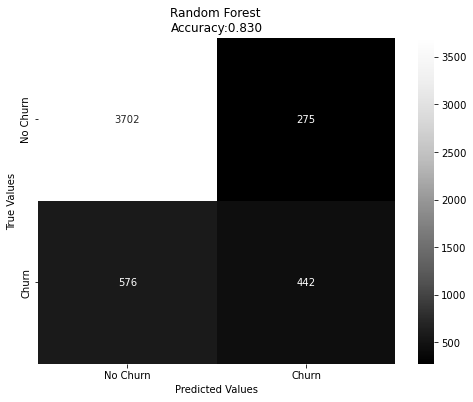

In [107]:
#plot the confusion matrix

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='g',cmap='Greys_r')
plt.title("Random Forest \nAccuracy:{0:.3f}".format(accuracy_score(y_test1, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

The overall F1 score is .83. The F1 score of the customers who have churned is less than 50%. This is due to highly imbalanced data, as a result the model has failed to generalize. 

### End Exercise 8.09

## ROC Curve
**The Receiver Operating Characteristic Curve** is a graphical method used to inspect the performance of binary classification models by shifting the decision threshold classifier. It is plotted on the **TPR** (Recall) and the **False Positivity Rate** (FPR). 

**Negative Recall**
- the ability of the classifier to correctly find all the negative samples.

## Exercise 8.10: Plotting the ROC Curve

In [108]:
from sklearn.metrics import roc_curve, auc

In [109]:
fpr, tpr, thresholds = roc_curve(y_test1, y_pred, pos_label=1)
roc_auc = metrics.auc(fpr,tpr)

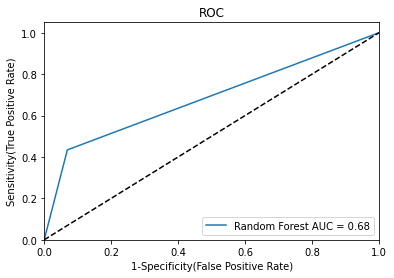

In [114]:
plt.figure()
plt.title('ROC')
plt.plot(fpr,tpr,label='%s AUC = %0.2f' % ('Random Forest', roc_auc))
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.05])
plt.ylabel('Sensitivity(True Positive Rate)')
plt.xlabel('1-Specificity(False Positive Rate)')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

The model has an area under the curve of 0.68. Even though the F1 score of the model was calculated at 0.83, from the calssification report, the AUC (Area under curve) score is much less. The FPR is closer to 0. the TPR is closer to .4. 

### End Exercise 8.10